In [1]:
# Library imports
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import pennylane as qml
import h5py

# Pytorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from python_package.metrics import FID, relative_entropy
from IPython.display import clear_output



# Set the random seed for reproducibility
seed = 24
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [2]:
with h5py.File("/home/reyguadarrama/GSoC/data/gluon_data/gluon_ECAL_sumpool_8x8.h5", 'r') as file:
    all_gluon_8x8 = file['gluon_ECAL_sumpool_8x8'][:500]

### **Cropped jets analysis**

In [3]:
gluon_ECAL_overlay = np.mean(all_gluon_8x8, axis=0)
total_energy = np.sum(all_gluon_8x8, axis=(1,2))
particles_energy_deposits = all_gluon_8x8[all_gluon_8x8 > 0]

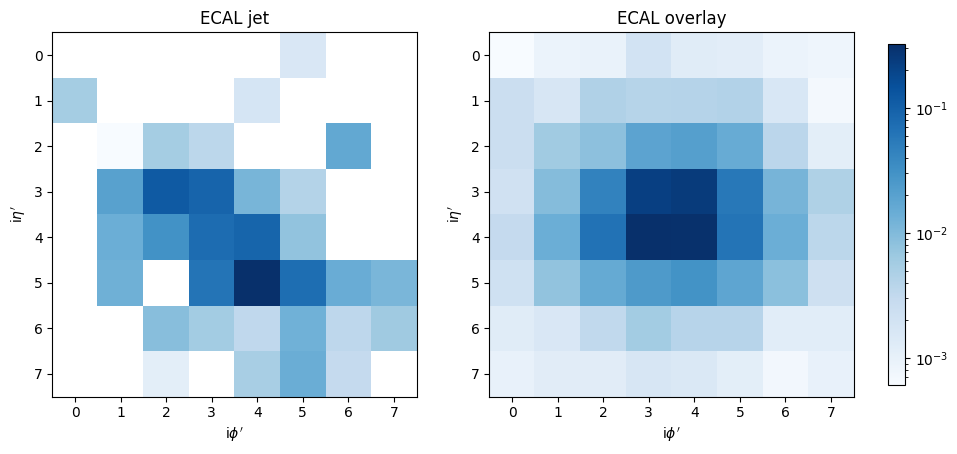

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

im1 = axs[0].imshow(all_gluon_8x8[0], cmap="Blues", norm=mcolors.LogNorm())
axs[0].set_title("ECAL jet")

axs[1].imshow(gluon_ECAL_overlay, cmap="Blues", norm=mcolors.LogNorm())
axs[1].set_title("ECAL overlay")

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

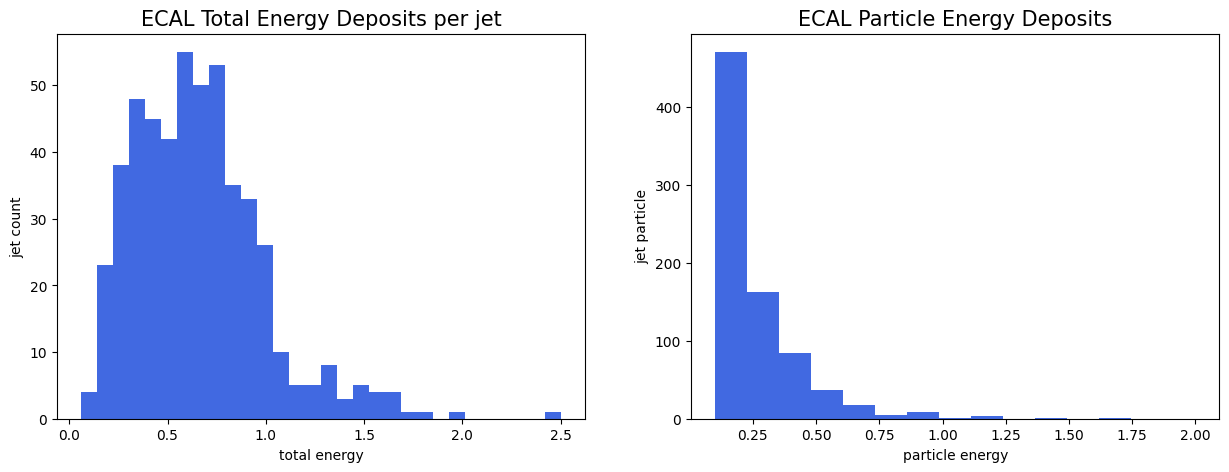

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(total_energy, bins=30, color="royalblue")
axs[0].set_title("ECAL Total Energy Deposits per jet", fontsize=15)
axs[0].set_xlabel("total energy")
axs[0].set_ylabel("jet count")

axs[1].hist(particles_energy_deposits, range=(0.1, 2), bins=15, color="royalblue")
axs[1].set_title("ECAL Particle Energy Deposits", fontsize=15)
axs[1].set_xlabel("particle energy")
axs[1].set_ylabel("jet particle")

plt.show()

### **Shifted jets analysis**

In [6]:
shifted_gluon_8x8 = (all_gluon_8x8*8)

shifted_total_energy = np.sum(shifted_gluon_8x8, axis=(1,2))
shifted_ECAL_overlay = np.mean(shifted_gluon_8x8, axis=0)
shifted_particles_energy_deposits = shifted_gluon_8x8[shifted_gluon_8x8 > 0]

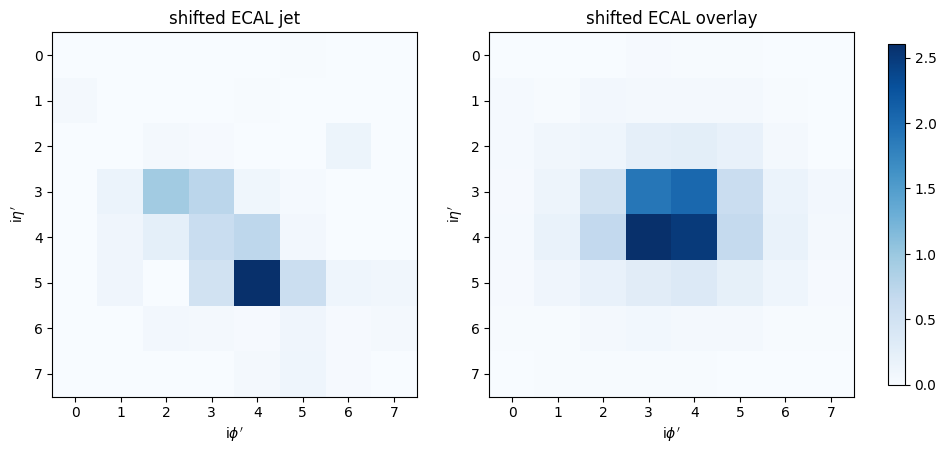

In [7]:
shifted_gluon_ECAL_overlay = np.mean(shifted_gluon_8x8, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(11, 5))

im1 = axs[0].imshow(shifted_gluon_8x8[0], cmap="Blues")
axs[0].set_title("shifted ECAL jet")

axs[1].imshow(shifted_gluon_ECAL_overlay, cmap="Blues")
axs[1].set_title("shifted ECAL overlay")

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

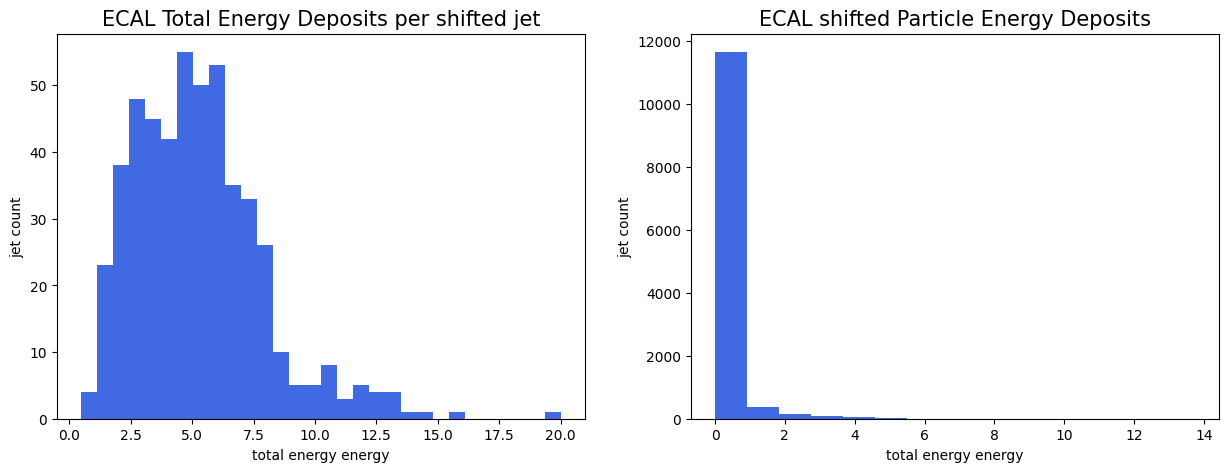

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(shifted_total_energy, bins=30, color="royalblue")
axs[0].set_title("ECAL Total Energy Deposits per shifted jet", fontsize=15)
axs[0].set_xlabel("total energy energy")
axs[0].set_ylabel("jet count")

axs[1].hist(shifted_particles_energy_deposits, bins=15, color="royalblue")
axs[1].set_title("ECAL shifted Particle Energy Deposits", fontsize=15)
axs[1].set_xlabel("total energy energy")
axs[1].set_ylabel("jet count")

plt.show()

In [9]:
for i, jet in enumerate(shifted_gluon_8x8):
    if (jet>10).any():
        print(i)

77
368


In [10]:
np.sum(shifted_gluon_8x8>10)

2

In [11]:
# Encontrar las imágenes que tienen al menos un píxel con valor mayor a 10
mask = np.any(shifted_gluon_8x8 > 10, axis=(1, 2))

# Filtrar las imágenes para eliminar las que tienen al menos un píxel con valor mayor a 10
filtered_gluon_8x8 = shifted_gluon_8x8[~mask]

In [12]:
print(shifted_gluon_8x8.min())
print(shifted_gluon_8x8.max())
print(filtered_gluon_8x8.max())

0.0
13.755006790161133
9.475181579589844


### **log normalization jets analysis**

In [13]:
lognorm_gluon_8x8 = np.log10(filtered_gluon_8x8 + 1)

lognorm_gluon_ECAL_overlay = np.mean(lognorm_gluon_8x8, axis=0)
lognorm_total_energy = np.sum(lognorm_gluon_8x8, axis=(1,2))
lognorm_particles_energy_deposits = lognorm_gluon_8x8[lognorm_gluon_8x8 > 0]

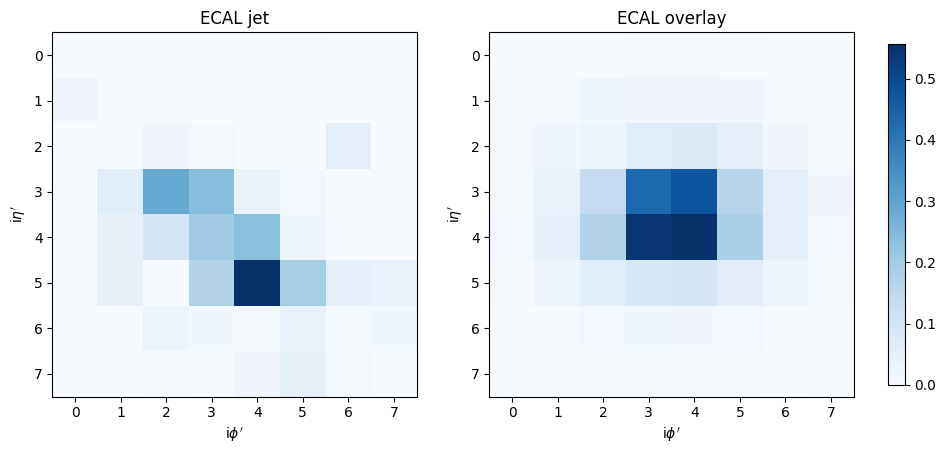

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

im1 = axs[0].imshow(lognorm_gluon_8x8[0], cmap="Blues")
axs[0].set_title("ECAL jet")

axs[1].imshow(lognorm_gluon_ECAL_overlay, cmap="Blues")
axs[1].set_title("ECAL overlay")

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

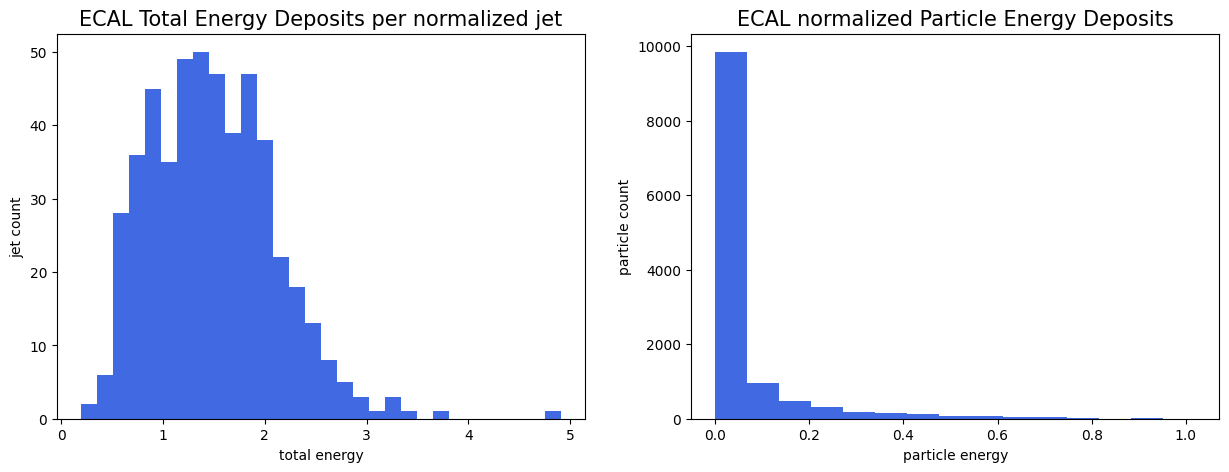

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(lognorm_total_energy, bins=30, color="royalblue")
axs[0].set_title("ECAL Total Energy Deposits per normalized jet", fontsize=15)
axs[0].set_xlabel("total energy")
axs[0].set_ylabel("jet count")

axs[1].hist(lognorm_particles_energy_deposits, bins=15, color="royalblue")
axs[1].set_title("ECAL normalized Particle Energy Deposits", fontsize=15)
axs[1].set_xlabel("particle energy")
axs[1].set_ylabel("particle count")

plt.show()

### **Shifting log normalization**

In [16]:
#lognorm_shifted_gluon_8x8 = (log_normalized_data*5) # Works well
#lognorm_shifted_gluon_8x8 = (log_normalized_data+0.1)*2 # Does not work
lognorm_shifted_gluon_8x8 = (lognorm_gluon_8x8+0.01)*5 # It looks promissing

lognorm_shifted_total_energy = np.sum(lognorm_shifted_gluon_8x8, axis=(1,2))
lognorm_shifted_ECAL_overlay = np.mean(lognorm_shifted_gluon_8x8, axis=0)
lognorm_shifted_particles_energy_deposits = lognorm_shifted_gluon_8x8[lognorm_shifted_gluon_8x8 > 0]

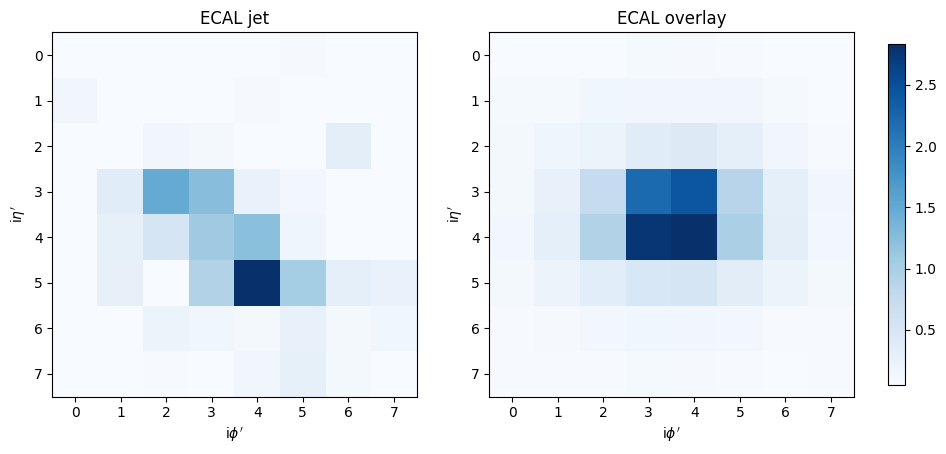

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

im1 = axs[0].imshow(lognorm_shifted_gluon_8x8[0], cmap="Blues")
axs[0].set_title("ECAL jet")

axs[1].imshow(lognorm_shifted_ECAL_overlay, cmap="Blues")
axs[1].set_title("ECAL overlay")

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

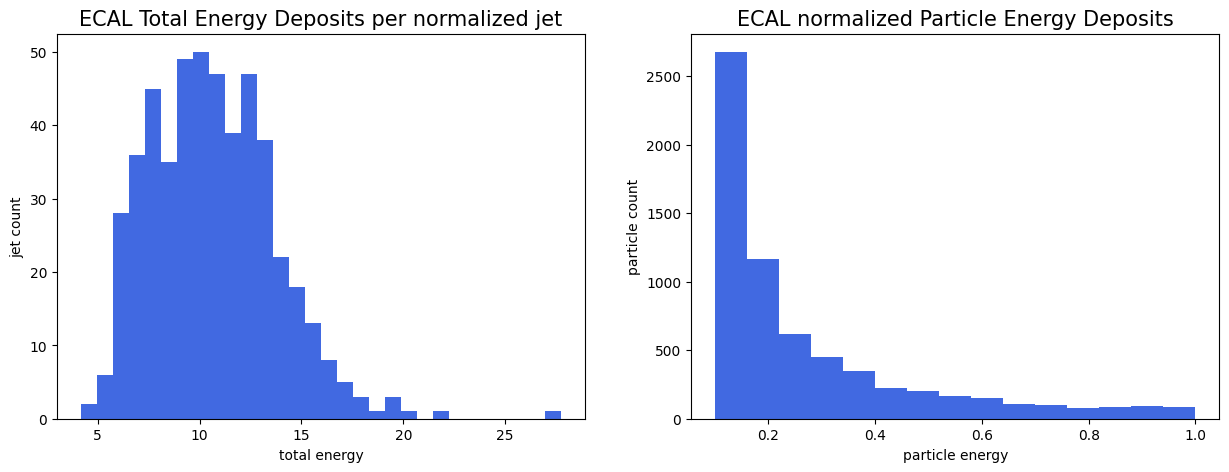

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(lognorm_shifted_total_energy, bins=30, color="royalblue")
axs[0].set_title("ECAL Total Energy Deposits per normalized jet", fontsize=15)
axs[0].set_xlabel("total energy")
axs[0].set_ylabel("jet count")

axs[1].hist(lognorm_shifted_particles_energy_deposits, range=(0.1, 1), bins=15, color="royalblue")
axs[1].set_title("ECAL normalized Particle Energy Deposits", fontsize=15)
axs[1].set_xlabel("particle energy")
axs[1].set_ylabel("particle count")

plt.show()

In [19]:
class QuarkDataset(Dataset):
    def __init__(self, image):
        self.data = torch.tensor(image, dtype=torch.float32) 

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [20]:
batch_size = 1 
n_samples = np.size(lognorm_shifted_gluon_8x8, axis=0)

# Quantum variables
n_qubits = 8  # Total number of qubits / N
n_a_qubits = 3  # Number of ancillary qubits / N_A
q_depth = 10  # Depth of the parameterised quantum circuit / D
n_generators = 2  # Number of subgenerators for the patch method / N_G

lrG = 0.3  # Learning rate for the generator
lrD = 0.01  # Learning rate for the discriminator
num_iter = 500  # Number of training iterations


In [21]:
# Create the data loader instance
dataset = QuarkDataset(lognorm_shifted_gluon_8x8.reshape(n_samples, 64))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [22]:
class Discriminator(nn.Module):
    """Fully connected classical discriminator"""

    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            # Inputs to first hidden layer (num_input_features -> 64)
            nn.Linear(64, 100),
            nn.ReLU(),
            # First hidden layer (64 -> 16)
            nn.Linear(100, 20),
            nn.ReLU(),
            # Second hidden layer (16 -> output)
            nn.Linear(20, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

In [23]:
dev = qml.device("default.qubit", wires=n_qubits)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

@qml.qnode(dev, diff_method="backprop")
def quantum_circuit(noise, weights):

    weights = weights.reshape(q_depth, n_qubits)

    # Initialise latent vectors
    for i in range(n_qubits):
        qml.RY(noise[i], wires=i)

    # Repeated layer
    for i in range(q_depth):
        # Parameterised layer
        for y in range(n_qubits):
            qml.RY(weights[i][y], wires=y)

        # Control Z gates
        for y in range(n_qubits - 1):
            qml.CZ(wires=[y, y + 1])

    return qml.probs(wires=list(range(n_qubits)))

In [24]:
weights = torch.rand(n_qubits*q_depth)
noise = torch.rand(8, n_qubits, device=device) * np.pi / 2

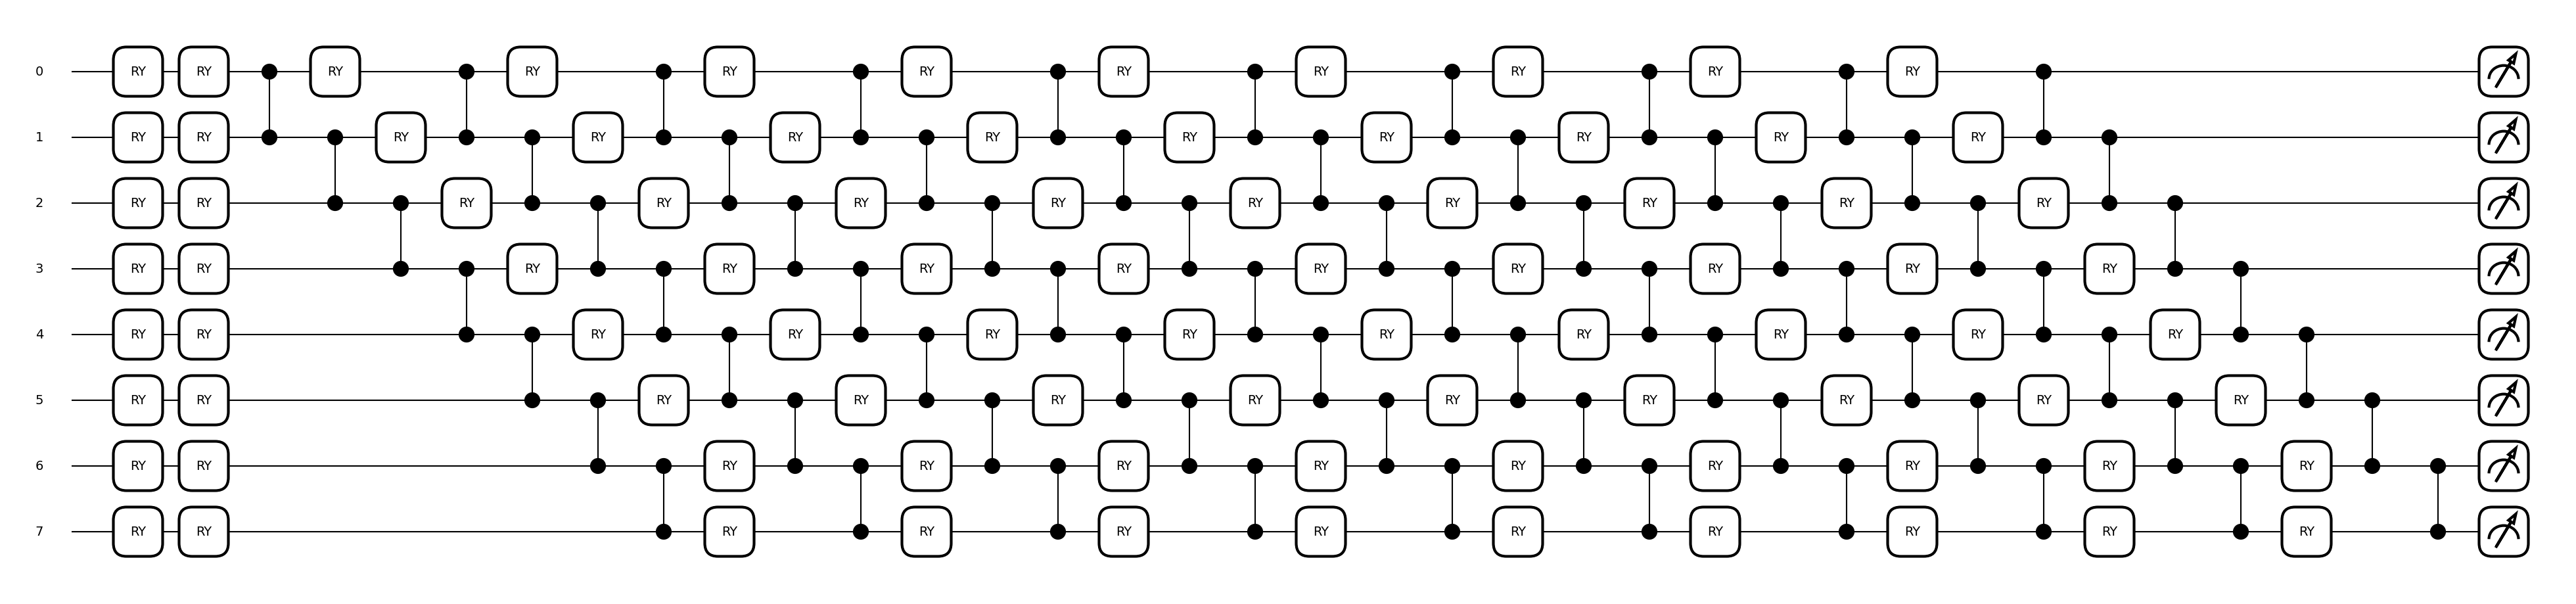

In [25]:
qml.draw_mpl(quantum_circuit)(noise, weights)
plt.show()

In [26]:
def partial_measure(noise, weights):
    # Non-linear Transform
    probs = quantum_circuit(noise, weights)
    probsgiven0 = probs[: (2 ** (n_qubits - n_a_qubits))]
    probsgiven0 /= torch.sum(probs)

    # Post-Processing
    probsgiven = probsgiven0 / torch.max(probsgiven0)
    return probsgiven

In [27]:
class PatchQuantumGenerator(nn.Module):
    """Quantum generator class for the patch method"""

    def __init__(self, n_generators, q_delta=1):
        """
        Args:
            n_generators (int): Number of sub-generators to be used in the patch method.
            q_delta (float, optional): Spread of the random distribution for parameter initialisation.
        """

        super().__init__()


        self.q_params = nn.ParameterList(
            [
                nn.Parameter(q_delta * torch.rand(q_depth * n_qubits), requires_grad=True)
                for _ in range(n_generators)
            ]
        )

        self.n_generators = n_generators

    def forward(self, x):
        # Size of each sub-generator output
        patch_size = 2 ** (n_qubits - n_a_qubits)

        # Create a Tensor to 'catch' a batch of images from the for loop. x.size(0) is the batch size.
        images = torch.Tensor(x.size(0), 0).to(device)

        # Iterate over all sub-generators
        for params in self.q_params:

            # Create a Tensor to 'catch' a batch of the patches from a single sub-generator
            patches = torch.Tensor(0, patch_size).to(device)
            for elem in x:
                q_out = partial_measure(elem, params).float().unsqueeze(0)
                patches = torch.cat((patches, q_out))

            # Each batch of patches is concatenated with each other to create a batch of images
            images = torch.cat((images, patches), 1)
            


        return images 

In [28]:
def plot_training_progress():
    # we don't plot if we don't have enough data
    if len(rel_entr) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))

    # Metric 1
    ax1.set_title("Relative Entropy", fontsize=15)
    ax1.plot(epochs, rel_entr, color="royalblue", linewidth=3)
    ax1.set_xlabel("Epoch")
    ax1.set_yscale("log")
    ax1.grid()

    # Metric 2
    ax2.set_title("FID", fontsize=15)
    ax2.plot(epochs, fid, color="cornflowerblue", linewidth=3)
    ax2.set_xlabel("Epoch")
    ax2.set_yscale("log")
    ax2.grid()

    # Generated distribution
    im = ax3.imshow(gen_ECAL_overlay, cmap='Blues', aspect='auto', vmax=0.7)
    ax3.set_title('Generated ECAL overlay', fontsize=15)

    fig.colorbar(im, ax=ax3)

    plt.suptitle(f"Epoch {counter}", fontsize=25)
    plt.show()

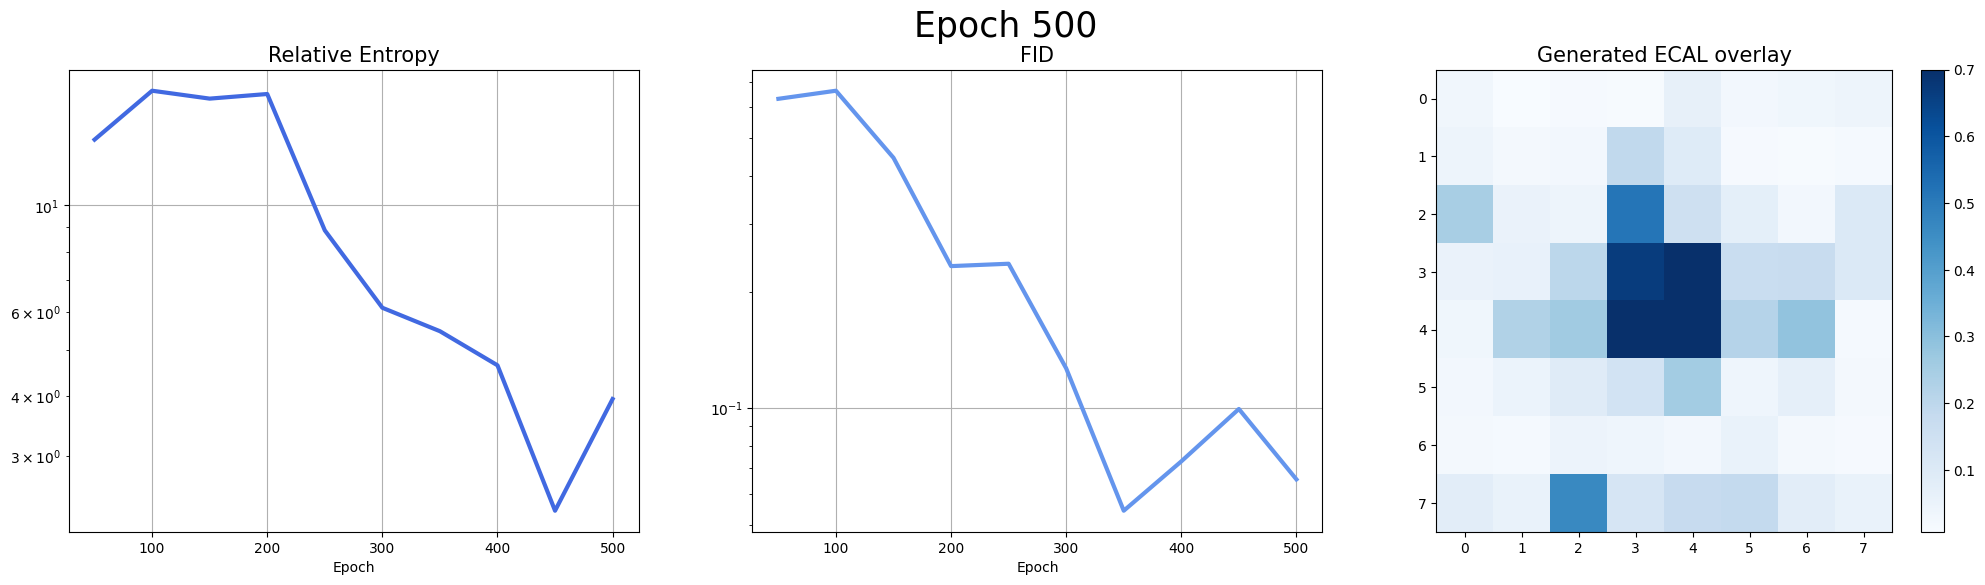

In [29]:
discriminator = Discriminator().to(device)
generator = PatchQuantumGenerator(n_generators).to(device)

# Binary cross entropy
criterion = nn.BCELoss()

# Optimisers
optD = optim.SGD(discriminator.parameters(), lr=lrD)
optG = optim.SGD(generator.parameters(), lr=lrG)

real_labels = torch.full((batch_size,), 1.0, dtype=torch.float, device=device)
fake_labels = torch.full((batch_size,), 0.0, dtype=torch.float, device=device)

# Fixed noise allows us to visually track the generated images throughout training
fixed_noise = torch.rand(8, n_qubits, device=device) * np.pi / 2

# Iteration counter
counter = 0

# plot lists
rel_entr = []
fid = []
epochs = []


while True:
    for i, data in enumerate(dataloader):


        # Data for training the discriminator
        #data = data.reshape(-1, image_size * image_size)
        real_data = data.to(device)

        # Noise follwing a uniform distribution in range [0,pi/2)
        noise = torch.rand(batch_size, n_qubits, device=device) * np.pi / 2
        fake_data = generator(noise)

        # Training the discriminator
        discriminator.zero_grad()
        outD_real = discriminator(real_data).view(-1)
        outD_fake = discriminator(fake_data.detach()).view(-1)

        errD_real = criterion(outD_real, real_labels)
        errD_fake = criterion(outD_fake, fake_labels)
        # Propagate gradients
        errD_real.backward()
        errD_fake.backward()

        errD = errD_real + errD_fake
        optD.step()

        # Training the generator
        generator.zero_grad()
        outD_fake = discriminator(fake_data).view(-1)
        errG = criterion(outD_fake, real_labels)
        errG.backward()
        optG.step()

        counter += 1

        # Show loss values
        if counter % 50 == 0:
            # Metrics evaluation
            noise = torch.rand(500, n_qubits, device=device)* np.pi / 2
            gen_ECAL_overlay = np.mean(generator(noise).detach().numpy().reshape(500, 8, 8), axis=0)
            fd = FID(lognorm_shifted_ECAL_overlay, gen_ECAL_overlay)
            re = relative_entropy(lognorm_shifted_ECAL_overlay, gen_ECAL_overlay)
            #test_images = generator(fixed_noise).view(8,1,8,8).cpu().detach()
            fid.append(fd)
            rel_entr.append(re)
            epochs.append(counter)

            plot_training_progress()
            
        if counter == num_iter:
            break
    if counter == num_iter:
        break

In [30]:
discriminator

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=64, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

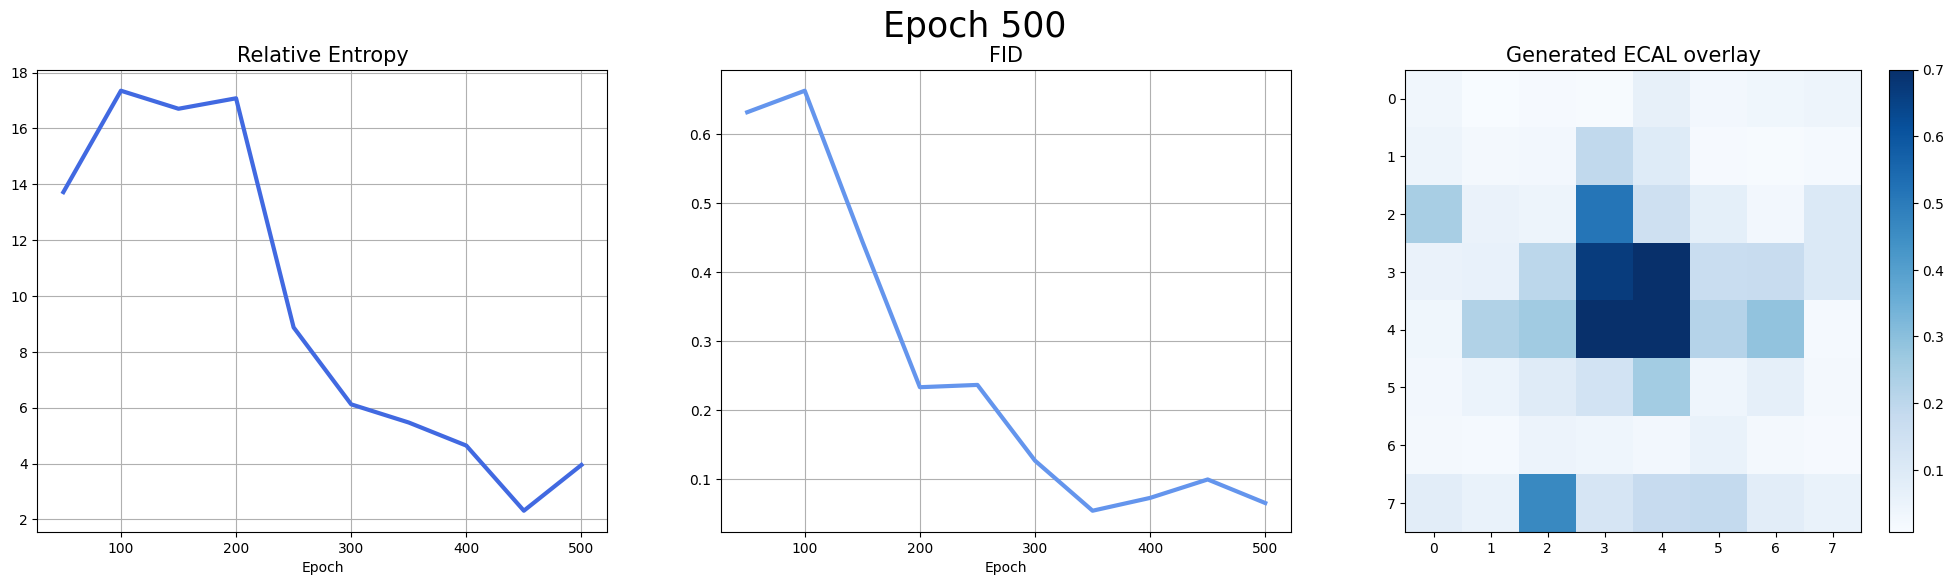

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))

# Metric 1
ax1.set_title("Relative Entropy", fontsize=15)
ax1.plot(epochs, rel_entr, color="royalblue", linewidth=3)
ax1.set_xlabel("Epoch")
#ax1.set_yscale("log")
ax1.grid()

# Metric 2
ax2.set_title("FID", fontsize=15)
ax2.plot(epochs, fid, color="cornflowerblue", linewidth=3)
ax2.set_xlabel("Epoch")
#ax2.set_yscale("log")
ax2.grid()

# Generated distribution
im = ax3.imshow(gen_ECAL_overlay, cmap='Blues', aspect='auto', vmax=0.7)
ax3.set_title('Generated ECAL overlay', fontsize=15)

fig.colorbar(im, ax=ax3)

plt.suptitle(f"Epoch {counter}", fontsize=25)
plt.show()

In [32]:
generated_jets = generator(torch.rand(500, n_qubits, device=device) * np.pi / 2).detach().numpy().reshape(500, 8, 8)


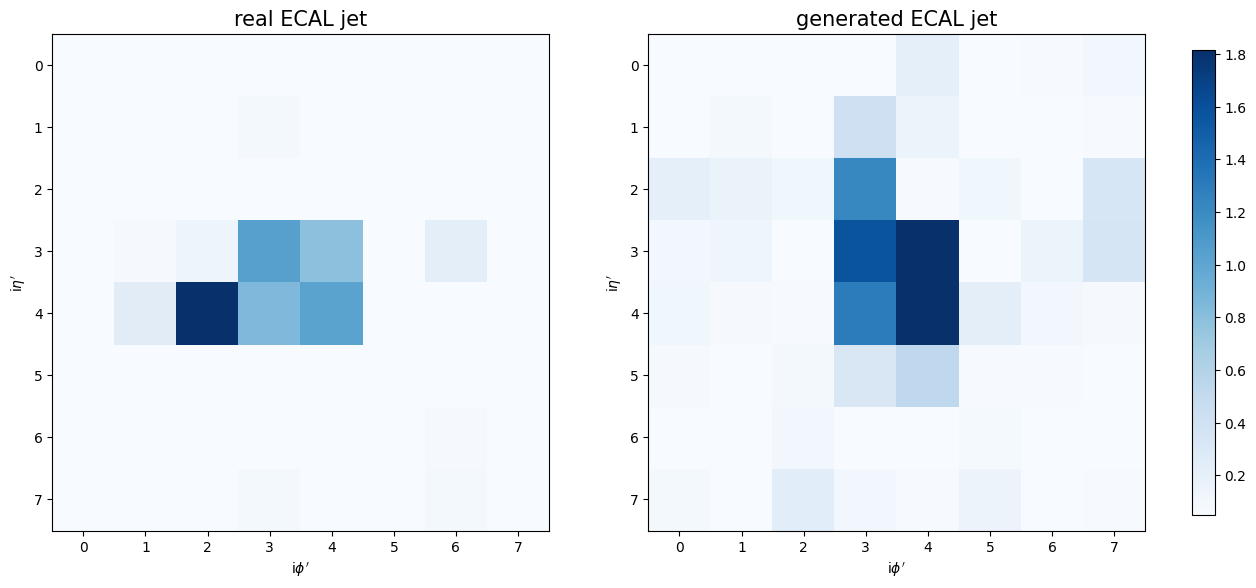

In [38]:
fig, axs =  plt.subplots(1, 2, figsize=(15, 7)) 
n = 8

im1 = axs[0].imshow(lognorm_shifted_gluon_8x8[n], cmap="Blues")
axs[0].set_title("real ECAL jet", fontsize=15)

im2 = axs[1].imshow(generated_jets[n], cmap='Blues')
axs[1].set_title("generated ECAL jet", fontsize=15)

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

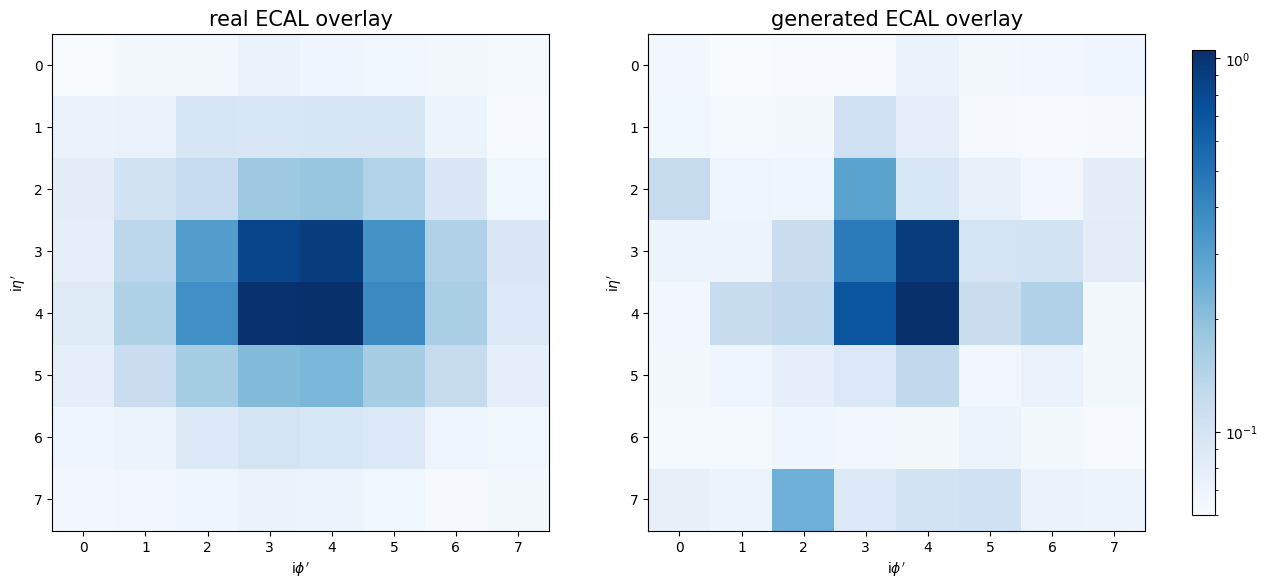

In [34]:
gen_jets_image = np.mean(generated_jets, axis=0)
real_jets_image = np.mean(lognorm_shifted_gluon_8x8, axis=0)

fig, axs =  plt.subplots(1, 2, figsize=(15, 7)) 

im1 = axs[0].imshow(real_jets_image, cmap="Blues", norm=mcolors.LogNorm())
axs[0].set_title("real ECAL overlay", fontsize=15)

im2 = axs[1].imshow(gen_jets_image, cmap='Blues')
axs[1].set_title("generated ECAL overlay", fontsize=15)

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

In [40]:
gen_total_energy = np.sum(generated_jets, axis=(1,2))
gen_max_energy_dep = np.max(generated_jets, axis=(1, 2))

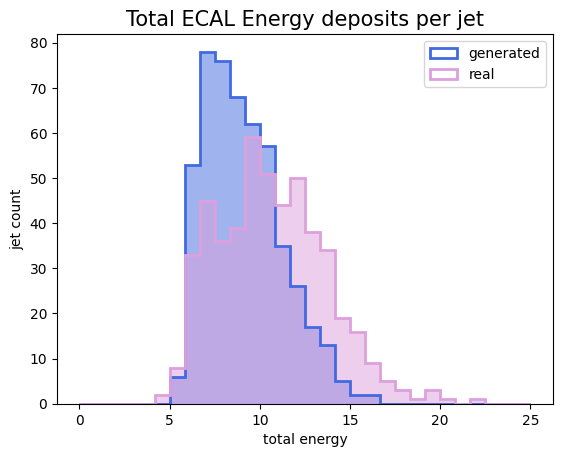

In [41]:
plt.hist(gen_total_energy, range=(0, 25), bins=30, color="royalblue", label="generated", histtype="step", linewidth=2)
plt.hist(gen_total_energy, range=(0, 25), bins=30, color="royalblue", alpha=0.5)
plt.hist(lognorm_shifted_total_energy, range=(0, 25), bins=30, color="plum", label="real", histtype="step", linewidth=2)
plt.hist(lognorm_shifted_total_energy, range=(0, 25), bins=30, color="plum", alpha=0.5)
plt.title("Total ECAL Energy deposits per jet", fontsize=15)
plt.xlabel("total energy")
plt.ylabel("jet count")
plt.legend()
plt.show()

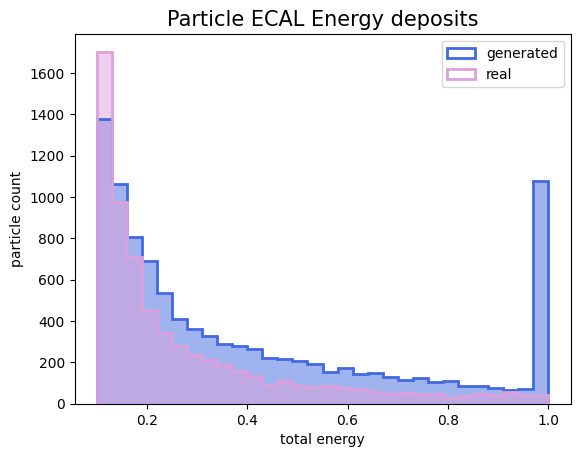

In [42]:
gen_particles_energy_deposits = generated_jets[generated_jets > 0]

plt.hist(gen_particles_energy_deposits, range=(0.1, 1), bins=30, color="royalblue", label="generated", histtype="step", linewidth=2)
plt.hist(gen_particles_energy_deposits, range=(0.1, 1), bins=30, color="royalblue", alpha=0.5)
plt.hist(lognorm_shifted_particles_energy_deposits, range=(0.1, 1), bins=30, color="plum", label="real", histtype="step", linewidth=2)
plt.hist(lognorm_shifted_particles_energy_deposits, range=(0.1, 1), bins=30, color="plum", alpha=0.5)
plt.title("Particle ECAL Energy deposits", fontsize=15)
plt.xlabel("total energy")
plt.ylabel("particle count")
plt.legend()
plt.show()